<a href="https://colab.research.google.com/github/Kamilo1133/data-science-bootcamp/blob/main/CASE_STUDY_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczace notowan spolek na gieldzie wedlug symboli
    na serwisie stooq.pl"""
    import pandas_datareader as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-03-17 to 2020-03-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-17,198.7700,199.0000,194.3247,195.7400,47341752
2025-03-14,197.4100,198.6500,195.3200,197.9500,38096663
2025-03-13,198.1650,198.8799,191.8200,193.8900,41270761
2025-03-12,200.7200,201.5200,195.2900,198.8900,43679284
2025-03-11,193.9000,200.1800,193.4000,196.5900,54002880
...,...,...,...,...,...
2020-03-25,96.0345,97.5130,94.2890,94.2920,129581460
2020-03-24,97.5748,97.7500,95.0170,97.0050,142941600
2020-03-23,91.3875,95.9700,90.6000,95.1415,156169780


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-11,193.900,200.1800,193.4000,196.59,54002880


In [ ]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-11,193.900,200.1800,193.4000,196.59,54002880
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-06,204.400,205.7700,198.3015,200.70,49863755
2025-03-05,204.800,209.9800,203.2600,208.36,38610085


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-25,96.0345,97.513,94.2890,94.2920,129581460
2020-03-24,97.5748,97.750,95.0170,97.0050,142941600
2020-03-23,91.3875,95.970,90.6000,95.1415,156169780
2020-03-20,96.3155,97.850,91.0365,92.3045,196357000
2020-03-19,93.0000,97.250,91.6325,94.0465,207998860


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns]

In [ ]:
df.head()

,open,high,low,close,volume
Date,,,,,
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-11,193.900,200.1800,193.4000,196.59,54002880


In [ ]:
df.describe()

,open,high,low,close,volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,151.821609,153.652334,149.826018,151.771047,6.583331e+07
std,33.570035,33.630300,33.358505,33.501061,3.185996e+07
min,82.800000,83.480000,81.430000,81.820000,1.500750e+07
25%,126.160000,128.095000,124.433500,126.350000,4.435502e+07
50%,156.814000,158.752000,154.680000,156.553000,5.876064e+07
75%,173.294500,174.775000,171.541000,173.123000,7.792336e+07
max,239.015000,242.520000,238.030000,242.060000,2.726617e+08


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1255.0,1.518216e+02,3.357003e+01,82.80,1.261600e+02,1.568140e+02,1.732945e+02,2.390150e+02
high,1255.0,1.536523e+02,3.363030e+01,83.48,1.280950e+02,1.587520e+02,1.747750e+02,2.425200e+02
low,1255.0,1.498260e+02,3.335850e+01,81.43,1.244335e+02,1.546800e+02,1.715410e+02,2.380300e+02
close,1255.0,1.517710e+02,3.350106e+01,81.82,1.263500e+02,1.565530e+02,1.731230e+02,2.420600e+02
volume,1255.0,6.583331e+07,3.185996e+07,15007497.00,4.435502e+07,5.876064e+07,7.792336e+07,2.726617e+08


In [ ]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-11,193.900,200.1800,193.4000,196.59,54002880
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-06,204.400,205.7700,198.3015,200.70,49863755
2025-03-05,204.800,209.9800,203.2600,208.36,38610085


In [ ]:
df['open']

,open
Date,
2025-03-17,198.770
2025-03-14,197.410
2025-03-13,198.165
2025-03-12,200.720
2025-03-11,193.900
2025-03-10,195.600
2025-03-07,199.490
2025-03-06,204.400
2025-03-05,204.800


In [ ]:
df.open

,open
Date,
2025-03-17,198.770
2025-03-14,197.410
2025-03-13,198.165
2025-03-12,200.720
2025-03-11,193.900
2025-03-10,195.600
2025-03-07,199.490
2025-03-06,204.400
2025-03-05,204.800


In [ ]:
df[['open']]

,open
Date,
2025-03-17,198.770
2025-03-14,197.410
2025-03-13,198.165
2025-03-12,200.720
2025-03-11,193.900
2025-03-10,195.600
2025-03-07,199.490
2025-03-06,204.400
2025-03-05,204.800


In [ ]:
df[['open','close']]

,open,close
Date,,
2025-03-17,198.770,195.74
2025-03-14,197.410,197.95
2025-03-13,198.165,193.89
2025-03-12,200.720,198.89
2025-03-11,193.900,196.59
2025-03-10,195.600,194.54
2025-03-07,199.490,199.25
2025-03-06,204.400,200.70
2025-03-05,204.800,208.36


In [ ]:
df.iloc[:,0]

,open
Date,
2025-03-17,198.770
2025-03-14,197.410
2025-03-13,198.165
2025-03-12,200.720
2025-03-11,193.900
2025-03-10,195.600
2025-03-07,199.490
2025-03-06,204.400
2025-03-05,204.800


In [ ]:
df.iloc[:,[0,3]]

,open,close
Date,,
2025-03-17,198.770,195.74
2025-03-14,197.410,197.95
2025-03-13,198.165,193.89
2025-03-12,200.720,198.89
2025-03-11,193.900,196.59
2025-03-10,195.600,194.54
2025-03-07,199.490,199.25
2025-03-06,204.400,200.70
2025-03-05,204.800,208.36


In [ ]:
df.iloc[:,3:5]

,close,volume
Date,,
2025-03-17,195.74,47341752
2025-03-14,197.95,38096663
2025-03-13,193.89,41270761
2025-03-12,198.89,43679284
2025-03-11,196.59,54002880
2025-03-10,194.54,62350926
2025-03-07,199.25,59802821
2025-03-06,200.70,49863755
2025-03-05,208.36,38610085


In [ ]:
df.iloc[:,-1]

,volume
Date,
2025-03-17,47341752
2025-03-14,38096663
2025-03-13,41270761
2025-03-12,43679284
2025-03-11,54002880
2025-03-10,62350926
2025-03-07,59802821
2025-03-06,49863755
2025-03-05,38610085


In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-11,193.900,200.1800,193.4000,196.59,54002880
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-06,204.400,205.7700,198.3015,200.70,49863755
2025-03-05,204.800,209.9800,203.2600,208.36,38610085


In [ ]:
df.iloc[:,-3:]

,low,close,volume
Date,,,
2025-03-17,194.3247,195.74,47341752
2025-03-14,195.3200,197.95,38096663
2025-03-13,191.8200,193.89,41270761
2025-03-12,195.2900,198.89,43679284
2025-03-11,193.4000,196.59,54002880
2025-03-10,190.8500,194.54,62350926
2025-03-07,192.5300,199.25,59802821
2025-03-06,198.3015,200.70,49863755
2025-03-05,203.2600,208.36,38610085


In [ ]:
df.iloc[0]

,2025-03-17
open,1.987700e+02
high,1.990000e+02
low,1.943247e+02
close,1.957400e+02
volume,4.734175e+07


In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761


In [ ]:
df.loc['2025-03-05']

,2025-03-05
open,204.80
high,209.98
low,203.26
close,208.36
volume,38610085.00


In [ ]:
df.loc['2025-03-04': '2025-03-05']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-11,193.900,200.1800,193.4000,196.59,54002880
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-06,204.400,205.7700,198.3015,200.70,49863755
2025-03-05,204.800,209.9800,203.2600,208.36,38610085


In [ ]:
df.loc['2025-03-13']

,2025-03-13
open,1.981650e+02
high,1.988799e+02
low,1.918200e+02
close,1.938900e+02
volume,4.127076e+07


In [ ]:
df.loc['2025-03-10']

,2025-03-10
open,195.60
high,196.73
low,190.85
close,194.54
volume,62350926.00


In [ ]:
df.loc['2025-03-13' : '2025-03-10']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [ ]:
df.index

DatetimeIndex(['2025-03-17', '2025-03-14', '2025-03-13', '2025-03-12',
               '2025-03-11', '2025-03-10', '2025-03-07', '2025-03-06',
               '2025-03-05', '2025-03-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
df.loc['2025-03-13' : '2025-03-10']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [ ]:

df['2025-03-10' : '2025-03-13']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [ ]:
df = df.sort_index()

In [ ]:
df['2025-03-10' : '2025-03-13']

,open,high,low,close,volume
Date,,,,,
2025-03-10,195.600,196.7300,190.85,194.54,62350926
2025-03-11,193.900,200.1800,193.40,196.59,54002880
2025-03-12,200.720,201.5200,195.29,198.89,43679284
2025-03-13,198.165,198.8799,191.82,193.89,41270761


In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2025-03-04,200.110,206.8000,197.4320,203.80,60853084
2025-03-05,204.800,209.9800,203.2600,208.36,38610085
2025-03-06,204.400,205.7700,198.3015,200.70,49863755
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-11,193.900,200.1800,193.4000,196.59,54002880
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-14,197.410,198.6500,195.3200,197.95,38096663


In [ ]:
df[::-1]

,open,high,low,close,volume
Date,,,,,
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-11,193.900,200.1800,193.4000,196.59,54002880
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-06,204.400,205.7700,198.3015,200.70,49863755
2025-03-05,204.800,209.9800,203.2600,208.36,38610085


In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2025-03-04,200.110,206.8000,197.4320,203.80,60853084
2025-03-05,204.800,209.9800,203.2600,208.36,38610085
2025-03-06,204.400,205.7700,198.3015,200.70,49863755
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-11,193.900,200.1800,193.4000,196.59,54002880
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-14,197.410,198.6500,195.3200,197.95,38096663


In [4]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-03-17 to 2020-03-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-17,72.020,73.8100,71.775,72.73,20577768
2025-03-14,70.550,71.7899,70.330,71.55,13537279
2025-03-13,71.725,72.0000,69.360,69.51,15272232
2025-03-12,72.310,72.4200,69.550,71.20,17315032
2025-03-11,71.440,74.2500,69.570,70.65,26668190


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,46.738573,47.584691,45.870442,46.732040,2.448555e+07
std,16.636669,16.746911,16.444485,16.580063,1.678612e+07
min,15.960000,21.125500,15.700000,20.460000,5.200356e+06
25%,32.400000,33.065000,31.620000,32.495000,1.574201e+07
50%,44.120000,44.935000,43.465000,44.190000,2.059978e+07
75%,60.200000,61.050000,59.427500,60.350000,2.817056e+07
max,85.640000,87.000000,84.180000,86.340000,3.642612e+08


In [7]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-17,72.020,73.8100,71.775,72.73,20577768
2025-03-14,70.550,71.7899,70.330,71.55,13537279
2025-03-13,71.725,72.0000,69.360,69.51,15272232
2025-03-12,72.310,72.4200,69.550,71.20,17315032
2025-03-11,71.440,74.2500,69.570,70.65,26668190


In [8]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2025-03-17,72.020,73.8100,71.775,72.73,20577768,72.3750
2025-03-14,70.550,71.7899,70.330,71.55,13537279,71.0500
2025-03-13,71.725,72.0000,69.360,69.51,15272232,70.6175
2025-03-12,72.310,72.4200,69.550,71.20,17315032,71.7550
2025-03-11,71.440,74.2500,69.570,70.65,26668190,71.0450


In [9]:
df.sort_index()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-03-19,15.960,21.2600,15.7000,20.49,83988721,18.2250
2020-03-20,22.530,23.8900,20.6100,21.33,76529684,21.9300
2020-03-23,21.070,22.7300,19.7300,22.40,47787094,21.7350
2020-03-24,24.410,26.8400,23.5900,26.39,58505016,25.4000
2020-03-25,26.180,28.4500,25.3104,26.19,52473945,26.1850
...,...,...,...,...,...,...
2025-03-11,71.440,74.2500,69.5700,70.65,26668190,71.0450
2025-03-12,72.310,72.4200,69.5500,71.20,17315032,71.7550
2025-03-13,71.725,72.0000,69.3600,69.51,15272232,70.6175


In [10]:
df = df.sort_index()

In [11]:
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-03-19,15.96,21.26,15.7000,20.49,83988721,18.225
2020-03-20,22.53,23.89,20.6100,21.33,76529684,21.930
2020-03-23,21.07,22.73,19.7300,22.40,47787094,21.735
2020-03-24,24.41,26.84,23.5900,26.39,58505016,25.400
2020-03-25,26.18,28.45,25.3104,26.19,52473945,26.185


In [13]:
df[['Close']].shift(1)

,Close
Date,
2020-03-19,NaN
2020-03-20,20.49
2020-03-23,21.33
2020-03-24,22.40
2020-03-25,26.39
...,...
2025-03-11,73.06
2025-03-12,70.65
2025-03-13,71.20


In [14]:
df['Close_shift'] = df.Close.shift(1)

In [15]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2020-03-19,15.96,21.26,15.7000,20.49,83988721,18.225,NaN
2020-03-20,22.53,23.89,20.6100,21.33,76529684,21.930,20.49
2020-03-23,21.07,22.73,19.7300,22.40,47787094,21.735,21.33
2020-03-24,24.41,26.84,23.5900,26.39,58505016,25.400,22.40
2020-03-25,26.18,28.45,25.3104,26.19,52473945,26.185,26.39


In [22]:
df['Daily_Change'] = df.Close / df.Close_shift -1

In [19]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change
Date,,,,,,,,
2020-03-19,15.96,21.26,15.7000,20.49,83988721,18.225,NaN,NaN
2020-03-20,22.53,23.89,20.6100,21.33,76529684,21.930,20.49,0.040996
2020-03-23,21.07,22.73,19.7300,22.40,47787094,21.735,21.33,0.050164
2020-03-24,24.41,26.84,23.5900,26.39,58505016,25.400,22.40,0.178125
2020-03-25,26.18,28.45,25.3104,26.19,52473945,26.185,26.39,-0.007579


In [20]:
del df['Daily Change']

In [23]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-03-19,15.96,21.26,15.7000,20.49,83988721,18.225,NaN,NaN
2020-03-20,22.53,23.89,20.6100,21.33,76529684,21.930,20.49,0.040996
2020-03-23,21.07,22.73,19.7300,22.40,47787094,21.735,21.33,0.050164
2020-03-24,24.41,26.84,23.5900,26.39,58505016,25.400,22.40,0.178125
2020-03-25,26.18,28.45,25.3104,26.19,52473945,26.185,26.39,-0.007579


In [24]:
df.Daily_Change.min()

-0.11584196394322976

In [25]:
df.Daily_Change.max()

0.18902439024390238

<Axes: >

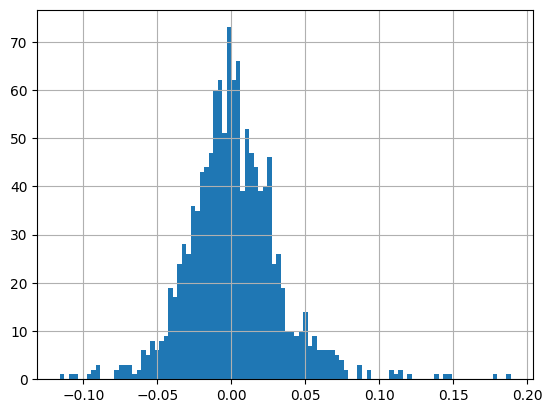

In [26]:
df.Daily_Change.hist(bins=100)

<Axes: >

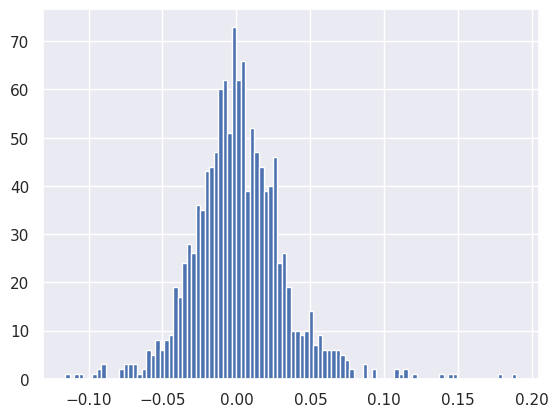

In [27]:
import seaborn as sns

sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

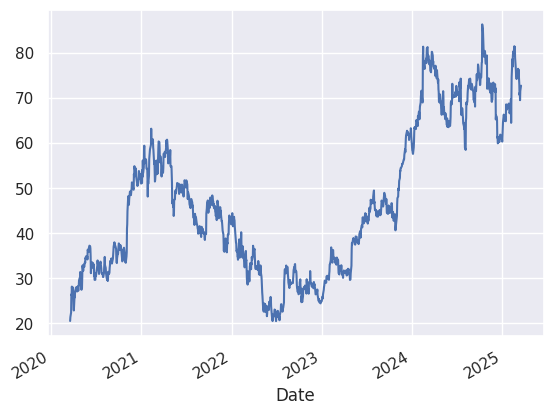

In [28]:
df.Close.plot()